In [45]:
import pandas as pd

In [46]:
!ls

2017 NEISS Data Highlights.pdf
2018-NEISS-CPSC-only-CodingManual.pdf
2018ComparabilityTable.pdf
Introduction to cleaning data maybe.ipynb
neiss2017.tsv
neiss_fmt.txt
race.csv


In [47]:
!head -n 5 neiss2017.tsv

In [48]:
# Put cursor inside of read_csv,
# hold shift, press tab (or tap it a few times)
#df = pd.read_csv("neiss2017.tsv", sep="\t", encoding="latin-1") same as iso8859-1
df = pd.read_csv("neiss2017.tsv", sep="\t", encoding="iso8859-1")
df.head()

/Users/soma/.pyenv/versions/3.8.2/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (0,2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


CPSC_Case_Number Treatment_Date Age  Sex  Race Other_Race  Body_Part  \
0        170100733     01/01/2017  21    1   1.0        NaN       75.0   
1        170100734     01/01/2017  71    1   1.0        NaN       31.0   
2        170100735     01/01/2017  16    1   1.0        NaN       33.0   
3        170100737     01/01/2017  55    2   1.0        NaN       75.0   
4        170100740     01/01/2017  86    2   1.0        NaN       79.0   

   Diagnosis Other_Diagnosis  Disposition  Location  Fire_Involvement  \
0       62.0             NaN          1.0       1.0               0.0   
1       53.0             NaN          1.0       5.0               0.0   
2       51.0             NaN          1.0       1.0               0.0   
3       62.0             NaN          1.0       1.0               0.0   
4       58.0             NaN          1.0       1.0               0.0   

   Product_1  Product_2                                        Narrative_1  \
0     1207.0        0.0  21YOM WAS BOXING WITH FRIEND WHILE DRINKING AN...   
1     1807.0        0.0  71YOM FELL ON FLOOR IN BATHROOM. DX RIB CONTUSION   
2      676.0      342.0  16YOM TRIPPED OVER A RUG AND FELL INTO A BURNI...   
3      620.0        0.0  55YOF WAS STANDING ON A STEP STOOL AND LOST FO...   
4     1646.0     4056.0  86YOF GOT TANGLED IN COAT AND FELL BACKWARD ST...   

                                         Narrative_2 Stratum   PSU   Weight  
0  . BAC= 93.6 DX HEAD INJURY AND ALCOHOL INTOXIC...       S  46.0  77.6641  
1                                                NaN       S  46.0  77.6641  
2  DX BURNS INVOLVING LESS THAN 10% OF BODY SURFA...       S  46.0  77.6641  
3                                        HEAD INJURY       S  46.0  77.6641  
4          H. DX HEMATOMA OF SOFT TISSUE, LEFT FLANK       S  46.0  77.6641

In [49]:
df.head(2)

CPSC_Case_Number Treatment_Date Age  Sex  Race Other_Race  Body_Part  \
0        170100733     01/01/2017  21    1   1.0        NaN       75.0   
1        170100734     01/01/2017  71    1   1.0        NaN       31.0   

   Diagnosis Other_Diagnosis  Disposition  Location  Fire_Involvement  \
0       62.0             NaN          1.0       1.0               0.0   
1       53.0             NaN          1.0       5.0               0.0   

   Product_1  Product_2                                        Narrative_1  \
0     1207.0        0.0  21YOM WAS BOXING WITH FRIEND WHILE DRINKING AN...   
1     1807.0        0.0  71YOM FELL ON FLOOR IN BATHROOM. DX RIB CONTUSION   

                                         Narrative_2 Stratum   PSU   Weight  
0  . BAC= 93.6 DX HEAD INJURY AND ALCOHOL INTOXIC...       S  46.0  77.6641  
1                                                NaN       S  46.0  77.6641

In [50]:
df.dtypes

CPSC_Case_Number     object
Treatment_Date       object
Age                  object
Sex                   int64
Race                float64
Other_Race           object
Body_Part           float64
Diagnosis           float64
Other_Diagnosis      object
Disposition         float64
Location            float64
Fire_Involvement    float64
Product_1           float64
Product_2           float64
Narrative_1          object
Narrative_2          object
Stratum              object
PSU                 float64
Weight              float64
dtype: object

In [51]:
# What are some questions we can ask about age????
df[df.Age == 'C']

CPSC_Case_Number Treatment_Date Age  Sex   Race Other_Race  Body_Part  \
160878      ;CONCUSSION            NaN   C    8  4.757        NaN        NaN   

        Diagnosis Other_Diagnosis  Disposition  Location  Fire_Involvement  \
160878        NaN             NaN          NaN       NaN               NaN   

        Product_1  Product_2 Narrative_1 Narrative_2 Stratum  PSU  Weight  
160878        NaN        NaN         NaN         NaN     NaN  NaN     NaN

In [52]:
df[df.Treatment_Date == "NaN"]

Empty DataFrame
Columns: [CPSC_Case_Number, Treatment_Date, Age, Sex, Race, Other_Race, Body_Part, Diagnosis, Other_Diagnosis, Disposition, Location, Fire_Involvement, Product_1, Product_2, Narrative_1, Narrative_2, Stratum, PSU, Weight]
Index: []

In [53]:
df.shape

(386907, 19)

In [54]:
# Drop rows with missing data
df.dropna().shape

(2992, 19)

In [55]:
df.dropna(subset=['Treatment_Date']).shape

(386906, 19)

In [56]:
# Let's permanently change our dataframe to get
# rid of every row where Treatment_Date is missing
df = df.dropna(subset=['Treatment_Date'])
df.head(2)

CPSC_Case_Number Treatment_Date Age  Sex  Race Other_Race  Body_Part  \
0        170100733     01/01/2017  21    1   1.0        NaN       75.0   
1        170100734     01/01/2017  71    1   1.0        NaN       31.0   

   Diagnosis Other_Diagnosis  Disposition  Location  Fire_Involvement  \
0       62.0             NaN          1.0       1.0               0.0   
1       53.0             NaN          1.0       5.0               0.0   

   Product_1  Product_2                                        Narrative_1  \
0     1207.0        0.0  21YOM WAS BOXING WITH FRIEND WHILE DRINKING AN...   
1     1807.0        0.0  71YOM FELL ON FLOOR IN BATHROOM. DX RIB CONTUSION   

                                         Narrative_2 Stratum   PSU   Weight  
0  . BAC= 93.6 DX HEAD INJURY AND ALCOHOL INTOXIC...       S  46.0  77.6641  
1                                                NaN       S  46.0  77.6641

In [57]:
# Do we still have that bad Age row???
# nope!
df[df.Age == 'C']

Empty DataFrame
Columns: [CPSC_Case_Number, Treatment_Date, Age, Sex, Race, Other_Race, Body_Part, Diagnosis, Other_Diagnosis, Disposition, Location, Fire_Involvement, Product_1, Product_2, Narrative_1, Narrative_2, Stratum, PSU, Weight]
Index: []

In [58]:
df.Age.median()

29.0

In [59]:
df.Age.mean()

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [60]:
df.dtypes

CPSC_Case_Number     object
Treatment_Date       object
Age                  object
Sex                   int64
Race                float64
Other_Race           object
Body_Part           float64
Diagnosis           float64
Other_Diagnosis      object
Disposition         float64
Location            float64
Fire_Involvement    float64
Product_1           float64
Product_2           float64
Narrative_1          object
Narrative_2          object
Stratum              object
PSU                 float64
Weight              float64
dtype: object

In [61]:
# Permanently change Age to be an integer
df.Age = df.Age.astype(int)

In [62]:
df.dtypes

CPSC_Case_Number     object
Treatment_Date       object
Age                   int64
Sex                   int64
Race                float64
Other_Race           object
Body_Part           float64
Diagnosis           float64
Other_Diagnosis      object
Disposition         float64
Location            float64
Fire_Involvement    float64
Product_1           float64
Product_2           float64
Narrative_1          object
Narrative_2          object
Stratum              object
PSU                 float64
Weight              float64
dtype: object

In [63]:
df.Age.mean()

44.36845900554657

In [64]:
df.Age.median()

29.0

In [65]:
df.Age.describe()

count    386906.000000
mean         44.368459
std          49.560967
min           0.000000
25%          12.000000
50%          29.000000
75%          60.000000
max         223.000000
Name: Age, dtype: float64

In [66]:
df[df.Age > 200]

CPSC_Case_Number Treatment_Date  Age  Sex  Race Other_Race  Body_Part  \
72            170104133     01/01/2017  212    1   0.0        NaN       75.0   
116           170106101     01/01/2017  208    2   3.0    UNKNOWN       75.0   
125           170106113     01/01/2017  218    2   1.0        NaN       83.0   
126           170106117     01/01/2017  218    1   1.0        NaN       32.0   
129           170106120     01/01/2017  204    2   3.0   HISPANIC       75.0   
...                 ...            ...  ...  ...   ...        ...        ...   
386890        180309750     12/18/2017  212    2   2.0        NaN       75.0   
386892        180309752     12/19/2017  218    1   1.0        NaN       85.0   
386903        180309763     12/31/2017  212    2   2.0        NaN       92.0   
386904        180309764     12/31/2017  218    1   1.0        NaN       81.0   
386905        180309765     12/31/2017  202    1   1.0        NaN       75.0   

        Diagnosis Other_Diagnosis  Disposition  Location  Fire_Involvement  \
72           62.0             NaN          1.0       1.0               0.0   
116          53.0             NaN          1.0       1.0               0.0   
125          57.0             NaN          1.0       1.0               0.0   
126          55.0             NaN          1.0       5.0               0.0   
129          53.0             NaN          1.0       1.0               0.0   
...           ...             ...          ...       ...               ...   
386890       62.0             NaN          4.0       1.0               0.0   
386892       68.0             NaN          4.0       1.0               0.0   
386903       50.0             NaN          4.0       1.0               0.0   
386904       57.0             NaN          4.0       1.0               0.0   
386905       57.0             NaN          4.0       1.0               0.0   

        Product_1  Product_2  \
72          671.0        0.0   
116        4076.0     1807.0   
125        1545.0        0.0   
126        1645.0        0.0   
129        4076.0     1807.0   
...           ...        ...   
386890      661.0        0.0   
386892     1913.0        0.0   
386903     4076.0        0.0   
386904     1395.0        0.0   
386905     1842.0        0.0   

                                              Narrative_1  \
72      12 MONTH OLD MALE CLIMBED UP ONTO ROCKING CHAR...   
116      8 MOF FELL OFF BED TO FLOOR.  DX SCALP CONTUSION   
125                    18 MOF FELL FROM CRIB.  DX FOOT FX   
126     18 MOM - PT EATING SPAGHETTI AT A RESTAURANT A...   
129      4 MOF FELL OFF BED TO FLOOR.  DX SCALP CONTUSION   
...                                                   ...   
386890  12MO F FELL OFF BUNK BED;DX CLOSED HEAD INJURY...   
386892  18MO M WITH REACTION TO *** LOTION; DX ALLERGI...   
386903  12MO F PT LYING IN BED, THERE WAS A DRIVE-BY S...   
386904                  18MO M SLIPPED ON TOY;DX FEMUR FX   
386905  2MO M DAD FELL ON STAIRS WHILE HOLDING BABY;DX...   

                                           Narrative_2 Stratum   PSU   Weight  
72                                  TH CLOSED HEAD INJ       V  38.0  16.1828  
116                                                NaN       C  31.0   4.7570  
125                                                NaN       C  31.0   4.7570  
126           VE AND HEARD A POP.  DX NURSEMAIDS ELBOW       C  31.0   4.7570  
129                                                NaN       C  31.0   4.7570  
...                                                ...     ...   ...      ...  
386890                                             NaN       C  20.0   4.7570  
386892                                             NaN       C  20.0   4.7570  
386903  UGH WALL AND HIT PT IN BED; DX AMPUTATED THUMB       C  20.0   4.7570  
386904                                             NaN       C  20.0   4.7570  
386905                                             NaN       C  20.0   4.7570  

[22818 rows x 19 columns]

In [67]:
df[df.Age > 200].shape

(22818, 19)

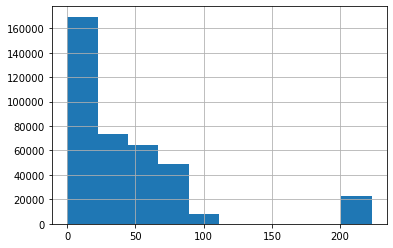

In [68]:
df.Age.hist()

In [70]:
# Removing everyone who is 200 years old or more
# "only keeping people who are under 200 years old"
df = df[df.Age < 200]
df.head()

CPSC_Case_Number Treatment_Date  Age  Sex  Race Other_Race  Body_Part  \
0        170100733     01/01/2017   21    1   1.0        NaN       75.0   
1        170100734     01/01/2017   71    1   1.0        NaN       31.0   
2        170100735     01/01/2017   16    1   1.0        NaN       33.0   
3        170100737     01/01/2017   55    2   1.0        NaN       75.0   
4        170100740     01/01/2017   86    2   1.0        NaN       79.0   

   Diagnosis Other_Diagnosis  Disposition  Location  Fire_Involvement  \
0       62.0             NaN          1.0       1.0               0.0   
1       53.0             NaN          1.0       5.0               0.0   
2       51.0             NaN          1.0       1.0               0.0   
3       62.0             NaN          1.0       1.0               0.0   
4       58.0             NaN          1.0       1.0               0.0   

   Product_1  Product_2                                        Narrative_1  \
0     1207.0        0.0  21YOM WAS BOXING WITH FRIEND WHILE DRINKING AN...   
1     1807.0        0.0  71YOM FELL ON FLOOR IN BATHROOM. DX RIB CONTUSION   
2      676.0      342.0  16YOM TRIPPED OVER A RUG AND FELL INTO A BURNI...   
3      620.0        0.0  55YOF WAS STANDING ON A STEP STOOL AND LOST FO...   
4     1646.0     4056.0  86YOF GOT TANGLED IN COAT AND FELL BACKWARD ST...   

                                         Narrative_2 Stratum   PSU   Weight  
0  . BAC= 93.6 DX HEAD INJURY AND ALCOHOL INTOXIC...       S  46.0  77.6641  
1                                                NaN       S  46.0  77.6641  
2  DX BURNS INVOLVING LESS THAN 10% OF BODY SURFA...       S  46.0  77.6641  
3                                        HEAD INJURY       S  46.0  77.6641  
4          H. DX HEMATOMA OF SOFT TISSUE, LEFT FLANK       S  46.0  77.6641

In [71]:
df.Sex.describe()

count    364088.000000
mean          1.461136
std           0.498527
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           2.000000
Name: Sex, dtype: float64

In [72]:
# Sex:
# Male: 1
# Female: 2
# Not recorded: 0
df.groupby('Sex').Age.median()

Sex
0    12
1    21
2    32
Name: Age, dtype: int64

In [73]:
# If you just want to replace one thing, you
# can do this, but....!!!
df.Sex.replace(1, 'M')

0         M
1         M
2         M
3         2
4         2
         ..
386899    2
386900    2
386901    M
386902    2
386906    2
Name: Sex, Length: 364088, dtype: object

In [78]:
import numpy as np

# We need to pull in NaN from np
# and replace the Sex column
# with our updated Sex column
df.Sex = df.Sex.replace({
    1: 'M',
    2: 'F',
    0: np.nan
})

In [80]:
df.head(2)

CPSC_Case_Number Treatment_Date  Age Sex  Race Other_Race  Body_Part  \
0        170100733     01/01/2017   21   M   1.0        NaN       75.0   
1        170100734     01/01/2017   71   M   1.0        NaN       31.0   

   Diagnosis Other_Diagnosis  Disposition  Location  Fire_Involvement  \
0       62.0             NaN          1.0       1.0               0.0   
1       53.0             NaN          1.0       5.0               0.0   

   Product_1  Product_2                                        Narrative_1  \
0     1207.0        0.0  21YOM WAS BOXING WITH FRIEND WHILE DRINKING AN...   
1     1807.0        0.0  71YOM FELL ON FLOOR IN BATHROOM. DX RIB CONTUSION   

                                         Narrative_2 Stratum   PSU   Weight  
0  . BAC= 93.6 DX HEAD INJURY AND ALCOHOL INTOXIC...       S  46.0  77.6641  
1                                                NaN       S  46.0  77.6641

In [81]:
df.groupby('Sex').Age.median()

Sex
F    32
M    21
Name: Age, dtype: int64

In [82]:
df.groupby('Sex', dropna=False).Age.median()

Sex
F      32
M      21
NaN    12
Name: Age, dtype: int64

In [83]:
df.head()

CPSC_Case_Number Treatment_Date  Age Sex  Race Other_Race  Body_Part  \
0        170100733     01/01/2017   21   M   1.0        NaN       75.0   
1        170100734     01/01/2017   71   M   1.0        NaN       31.0   
2        170100735     01/01/2017   16   M   1.0        NaN       33.0   
3        170100737     01/01/2017   55   F   1.0        NaN       75.0   
4        170100740     01/01/2017   86   F   1.0        NaN       79.0   

   Diagnosis Other_Diagnosis  Disposition  Location  Fire_Involvement  \
0       62.0             NaN          1.0       1.0               0.0   
1       53.0             NaN          1.0       5.0               0.0   
2       51.0             NaN          1.0       1.0               0.0   
3       62.0             NaN          1.0       1.0               0.0   
4       58.0             NaN          1.0       1.0               0.0   

   Product_1  Product_2                                        Narrative_1  \
0     1207.0        0.0  21YOM WAS BOXING WITH FRIEND WHILE DRINKING AN...   
1     1807.0        0.0  71YOM FELL ON FLOOR IN BATHROOM. DX RIB CONTUSION   
2      676.0      342.0  16YOM TRIPPED OVER A RUG AND FELL INTO A BURNI...   
3      620.0        0.0  55YOF WAS STANDING ON A STEP STOOL AND LOST FO...   
4     1646.0     4056.0  86YOF GOT TANGLED IN COAT AND FELL BACKWARD ST...   

                                         Narrative_2 Stratum   PSU   Weight  
0  . BAC= 93.6 DX HEAD INJURY AND ALCOHOL INTOXIC...       S  46.0  77.6641  
1                                                NaN       S  46.0  77.6641  
2  DX BURNS INVOLVING LESS THAN 10% OF BODY SURFA...       S  46.0  77.6641  
3                                        HEAD INJURY       S  46.0  77.6641  
4          H. DX HEMATOMA OF SOFT TISSUE, LEFT FLANK       S  46.0  77.6641

In [84]:
df.Race

0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
386899    1.0
386900    1.0
386901    2.0
386902    1.0
386906    1.0
Name: Race, Length: 364088, dtype: float64

In [85]:
df.Race.value_counts()

1.0    151268
0.0    136992
2.0     51135
3.0     18907
4.0      4223
5.0      1175
6.0       388
Name: Race, dtype: int64

In [88]:
df_race = pd.read_csv("race.csv")
df_race

key\tcode\tvalue
0                              RACE\t0\tN.S.
1                             RACE\t1\tWHITE
2            RACE\t2\tBLACK/AFRICAN AMERICAN
3                             RACE\t3\tOTHER
4                             RACE\t4\tASIAN
5     RACE\t5\tAMERICAN INDIAN/ALASKA NATIVE
6  RACE\t6\tNATIVE HAWAIIAN/PACIFIC ISLANDER

In [91]:
!cat race.csv

key	code	value
RACE	0	N.S.
RACE	1	WHITE
RACE	2	BLACK/AFRICAN AMERICAN
RACE	3	OTHER
RACE	4	ASIAN
RACE	5	AMERICAN INDIAN/ALASKA NATIVE
RACE	6	NATIVE HAWAIIAN/PACIFIC ISLANDER


In [89]:
# No wait, tab is our separator! not a comma!
df_race = pd.read_csv("race.csv", sep='\t')
df_race

key  code                             value
0  RACE     0                              N.S.
1  RACE     1                             WHITE
2  RACE     2            BLACK/AFRICAN AMERICAN
3  RACE     3                             OTHER
4  RACE     4                             ASIAN
5  RACE     5     AMERICAN INDIAN/ALASKA NATIVE
6  RACE     6  NATIVE HAWAIIAN/PACIFIC ISLANDER

In [90]:
df.head(2)

CPSC_Case_Number Treatment_Date  Age Sex  Race Other_Race  Body_Part  \
0        170100733     01/01/2017   21   M   1.0        NaN       75.0   
1        170100734     01/01/2017   71   M   1.0        NaN       31.0   

   Diagnosis Other_Diagnosis  Disposition  Location  Fire_Involvement  \
0       62.0             NaN          1.0       1.0               0.0   
1       53.0             NaN          1.0       5.0               0.0   

   Product_1  Product_2                                        Narrative_1  \
0     1207.0        0.0  21YOM WAS BOXING WITH FRIEND WHILE DRINKING AN...   
1     1807.0        0.0  71YOM FELL ON FLOOR IN BATHROOM. DX RIB CONTUSION   

                                         Narrative_2 Stratum   PSU   Weight  
0  . BAC= 93.6 DX HEAD INJURY AND ALCOHOL INTOXIC...       S  46.0  77.6641  
1                                                NaN       S  46.0  77.6641

In [98]:
# Add all of the columns from df_race to df
# matching them up based on Race and code
df.merge(df_race, left_on='Race', right_on='code')

CPSC_Case_Number Treatment_Date  Age Sex  Race Other_Race  Body_Part  \
0             170100733     01/01/2017   21   M   1.0        NaN       75.0   
1             170100734     01/01/2017   71   M   1.0        NaN       31.0   
2             170100735     01/01/2017   16   M   1.0        NaN       33.0   
3             170100737     01/01/2017   55   F   1.0        NaN       75.0   
4             170100740     01/01/2017   86   F   1.0        NaN       79.0   
...                 ...            ...  ...  ..   ...        ...        ...   
364083        180107683     12/29/2017   43   M   6.0        NaN       31.0   
364084        180116697     12/13/2017   56   F   6.0        NaN       75.0   
364085        180142065     12/25/2017   28   M   6.0        NaN       79.0   
364086        180150164     12/25/2017    2   M   6.0        NaN       76.0   
364087        180240281     12/24/2017   86   F   6.0        NaN       75.0   

        Diagnosis Other_Diagnosis  Disposition  ...  Product_1  Product_2  \
0            62.0             NaN          1.0  ...     1207.0        0.0   
1            53.0             NaN          1.0  ...     1807.0        0.0   
2            51.0             NaN          1.0  ...      676.0      342.0   
3            62.0             NaN          1.0  ...      620.0        0.0   
4            58.0             NaN          1.0  ...     1646.0     4056.0   
...           ...             ...          ...  ...        ...        ...   
364083       71.0            PAIN          1.0  ...     3299.0        0.0   
364084       62.0             NaN          1.0  ...      612.0     4057.0   
364085       64.0             NaN          1.0  ...     3265.0     1411.0   
364086       59.0             NaN          1.0  ...     4057.0        0.0   
364087       57.0             NaN          4.0  ...     1842.0        0.0   

                                              Narrative_1  \
0       21YOM WAS BOXING WITH FRIEND WHILE DRINKING AN...   
1       71YOM FELL ON FLOOR IN BATHROOM. DX RIB CONTUSION   
2       16YOM TRIPPED OVER A RUG AND FELL INTO A BURNI...   
3       55YOF WAS STANDING ON A STEP STOOL AND LOST FO...   
4       86YOF GOT TANGLED IN COAT AND FELL BACKWARD ST...   
...                                                   ...   
364083  43YOM PAIN TO CHEST AND LETHARGY WHEN WORKING ...   
364084  56YOF S/P FALL COVERED CORD W/RUG TRIPPED HIT ...   
364085  28 YOM DEAD LIFTED 90LB WEIGHTS AND CHAIN SAWS...   
364086  2 YOM RAN INTO A TABLE & HIT HIS FOREHEAD- LAC...   
364087                         86YOF S/P FALL DOWN STIARS   

                                              Narrative_2 Stratum   PSU  \
0       . BAC= 93.6 DX HEAD INJURY AND ALCOHOL INTOXIC...       S  46.0   
1                                                     NaN       S  46.0   
2       DX BURNS INVOLVING LESS THAN 10% OF BODY SURFA...       S  46.0   
3                                             HEAD INJURY       S  46.0   
4               H. DX HEMATOMA OF SOFT TISSUE, LEFT FLANK       S  46.0   
...                                                   ...     ...   ...   
364083                                       / PAIN CHEST       L  42.0   
364084  DX:CERVICAL STRAIN,CHI,CONTS CHEST WALL,DEGENE...       V  40.0   
364085                    DX:  R SIDED PARALUMBAR STRAIN.       V  93.0   
364086                            DX: FOREHEAD LACERATION       C  90.0   
364087             DX:SKULL FX,SCALP ABRAS,SCALP HEMATOMA       V  40.0   

         Weight   key  code                             value  
0       77.6641  RACE     1                             WHITE  
1       77.6641  RACE     1                             WHITE  
2       77.6641  RACE     1                             WHITE  
3       77.6641  RACE     1                             WHITE  
4       77.6641  RACE     1                             WHITE  
...         ...   ...   ...                               ...  
364083  76.8114  RACE     6  NATIVE HAWAIIAN/PACIFI

In [101]:
# Add all of the columns from df_race to df
# matching them up based on Race and code
# let's add the prefix race_ onto all of our
# race columns
df = df.merge(df_race.add_prefix("race_"), left_on='Race', right_on='race_code')

In [104]:
df = df.drop(columns=['Race'])
df.head()

CPSC_Case_Number Treatment_Date  Age Sex Other_Race  Body_Part  Diagnosis  \
0        170100733     01/01/2017   21   M        NaN       75.0       62.0   
1        170100734     01/01/2017   71   M        NaN       31.0       53.0   
2        170100735     01/01/2017   16   M        NaN       33.0       51.0   
3        170100737     01/01/2017   55   F        NaN       75.0       62.0   
4        170100740     01/01/2017   86   F        NaN       79.0       58.0   

  Other_Diagnosis  Disposition  Location  ...  Product_1  Product_2  \
0             NaN          1.0       1.0  ...     1207.0        0.0   
1             NaN          1.0       5.0  ...     1807.0        0.0   
2             NaN          1.0       1.0  ...      676.0      342.0   
3             NaN          1.0       1.0  ...      620.0        0.0   
4             NaN          1.0       1.0  ...     1646.0     4056.0   

                                         Narrative_1  \
0  21YOM WAS BOXING WITH FRIEND WHILE DRINKING AN...   
1  71YOM FELL ON FLOOR IN BATHROOM. DX RIB CONTUSION   
2  16YOM TRIPPED OVER A RUG AND FELL INTO A BURNI...   
3  55YOF WAS STANDING ON A STEP STOOL AND LOST FO...   
4  86YOF GOT TANGLED IN COAT AND FELL BACKWARD ST...   

                                         Narrative_2 Stratum   PSU   Weight  \
0  . BAC= 93.6 DX HEAD INJURY AND ALCOHOL INTOXIC...       S  46.0  77.6641   
1                                                NaN       S  46.0  77.6641   
2  DX BURNS INVOLVING LESS THAN 10% OF BODY SURFA...       S  46.0  77.6641   
3                                        HEAD INJURY       S  46.0  77.6641   
4          H. DX HEMATOMA OF SOFT TISSUE, LEFT FLANK       S  46.0  77.6641   

   race_key race_code  race_value  
0      RACE         1       WHITE  
1      RACE         1       WHITE  
2      RACE         1       WHITE  
3      RACE         1       WHITE  
4      RACE         1       WHITE  

[5 rows x 21 columns]

In [106]:
df[['Age', 'Sex']].head()

Age Sex
0   21   M
1   71   M
2   16   M
3   55   F
4   86   F

In [109]:
df = df.drop(columns=['race_key', 'race_code'])
df.head()

CPSC_Case_Number Treatment_Date  Age Sex Other_Race  Body_Part  Diagnosis  \
0        170100733     01/01/2017   21   M        NaN       75.0       62.0   
1        170100734     01/01/2017   71   M        NaN       31.0       53.0   
2        170100735     01/01/2017   16   M        NaN       33.0       51.0   
3        170100737     01/01/2017   55   F        NaN       75.0       62.0   
4        170100740     01/01/2017   86   F        NaN       79.0       58.0   

  Other_Diagnosis  Disposition  Location  Fire_Involvement  Product_1  \
0             NaN          1.0       1.0               0.0     1207.0   
1             NaN          1.0       5.0               0.0     1807.0   
2             NaN          1.0       1.0               0.0      676.0   
3             NaN          1.0       1.0               0.0      620.0   
4             NaN          1.0       1.0               0.0     1646.0   

   Product_2                                        Narrative_1  \
0        0.0  21YOM WAS BOXING WITH FRIEND WHILE DRINKING AN...   
1        0.0  71YOM FELL ON FLOOR IN BATHROOM. DX RIB CONTUSION   
2      342.0  16YOM TRIPPED OVER A RUG AND FELL INTO A BURNI...   
3        0.0  55YOF WAS STANDING ON A STEP STOOL AND LOST FO...   
4     4056.0  86YOF GOT TANGLED IN COAT AND FELL BACKWARD ST...   

                                         Narrative_2 Stratum   PSU   Weight  \
0  . BAC= 93.6 DX HEAD INJURY AND ALCOHOL INTOXIC...       S  46.0  77.6641   
1                                                NaN       S  46.0  77.6641   
2  DX BURNS INVOLVING LESS THAN 10% OF BODY SURFA...       S  46.0  77.6641   
3                                        HEAD INJURY       S  46.0  77.6641   
4          H. DX HEMATOMA OF SOFT TISSUE, LEFT FLANK       S  46.0  77.6641   

  race_value  
0      WHITE  
1      WHITE  
2      WHITE  
3      WHITE  
4      WHITE

In [111]:
# shift + tab to see how it works
# oh those docs were awful, just listen
# to what I say
df = df.rename(columns={
    'race_value': 'race'
})
df

CPSC_Case_Number Treatment_Date  Age Sex Other_Race  Body_Part  \
0             170100733     01/01/2017   21   M        NaN       75.0   
1             170100734     01/01/2017   71   M        NaN       31.0   
2             170100735     01/01/2017   16   M        NaN       33.0   
3             170100737     01/01/2017   55   F        NaN       75.0   
4             170100740     01/01/2017   86   F        NaN       79.0   
...                 ...            ...  ...  ..        ...        ...   
364083        180107683     12/29/2017   43   M        NaN       31.0   
364084        180116697     12/13/2017   56   F        NaN       75.0   
364085        180142065     12/25/2017   28   M        NaN       79.0   
364086        180150164     12/25/2017    2   M        NaN       76.0   
364087        180240281     12/24/2017   86   F        NaN       75.0   

        Diagnosis Other_Diagnosis  Disposition  Location  Fire_Involvement  \
0            62.0             NaN          1.0       1.0               0.0   
1            53.0             NaN          1.0       5.0               0.0   
2            51.0             NaN          1.0       1.0               0.0   
3            62.0             NaN          1.0       1.0               0.0   
4            58.0             NaN          1.0       1.0               0.0   
...           ...             ...          ...       ...               ...   
364083       71.0            PAIN          1.0       9.0               0.0   
364084       62.0             NaN          1.0       1.0               0.0   
364085       64.0             NaN          1.0       0.0               0.0   
364086       59.0             NaN          1.0       0.0               0.0   
364087       57.0             NaN          4.0       1.0               0.0   

        Product_1  Product_2  \
0          1207.0        0.0   
1          1807.0        0.0   
2           676.0      342.0   
3           620.0        0.0   
4          1646.0     4056.0   
...           ...        ...   
364083     3299.0        0.0   
364084      612.0     4057.0   
364085     3265.0     1411.0   
364086     4057.0        0.0   
364087     1842.0        0.0   

                                              Narrative_1  \
0       21YOM WAS BOXING WITH FRIEND WHILE DRINKING AN...   
1       71YOM FELL ON FLOOR IN BATHROOM. DX RIB CONTUSION   
2       16YOM TRIPPED OVER A RUG AND FELL INTO A BURNI...   
3       55YOF WAS STANDING ON A STEP STOOL AND LOST FO...   
4       86YOF GOT TANGLED IN COAT AND FELL BACKWARD ST...   
...                                                   ...   
364083  43YOM PAIN TO CHEST AND LETHARGY WHEN WORKING ...   
364084  56YOF S/P FALL COVERED CORD W/RUG TRIPPED HIT ...   
364085  28 YOM DEAD LIFTED 90LB WEIGHTS AND CHAIN SAWS...   
364086  2 YOM RAN INTO A TABLE & HIT HIS FOREHEAD- LAC...   
364087                         86YOF S/P FALL DOWN STIARS   

                                              Narrative_2 Stratum   PSU  \
0       . BAC= 93.6 DX HEAD INJURY AND ALCOHOL INTOXIC...       S  46.0   
1                                                     NaN       S  46.0   
2       DX BURNS INVOLVING LESS THAN 10% OF BODY SURFA...       S  46.0   
3                                             HEAD INJURY       S  46.0   
4               H. DX HEMATOMA OF SOFT TISSUE, LEFT FLANK       S  46.0   
...                                                   ...     ...   ...   
364083                                       / PAIN CHEST       L  42.0   
364084  DX:CERVICAL STRAIN,CHI,CONTS CHEST WALL,DEGENE...       V  40.0   
364085                    DX:  R SIDED PARALUMBAR STRAIN.       V  93.0   
364086                            DX: FOREHEAD LACERATION       C  90.0   
364087             DX:SKULL FX,SCALP ABRAS,SCALP HEMATOMA       V  40.0   

         Weight                              race  
0       77.6641                             WHITE  
1       77.6641                             WHITE  
2       77.6641   

In [112]:
df.race.value_counts()

WHITE                               151268
N.S.                                136992
BLACK/AFRICAN AMERICAN               51135
OTHER                                18907
ASIAN                                 4223
AMERICAN INDIAN/ALASKA NATIVE         1175
NATIVE HAWAIIAN/PACIFIC ISLANDER       388
Name: race, dtype: int64

In [114]:
# Replace N.S. with np.nan
# Why not df.race.replace("N.S.", "NaN")
df.race = df.race.replace("N.S.", np.nan)
df.head(2)

CPSC_Case_Number Treatment_Date  Age Sex Other_Race  Body_Part  Diagnosis  \
0        170100733     01/01/2017   21   M        NaN       75.0       62.0   
1        170100734     01/01/2017   71   M        NaN       31.0       53.0   

  Other_Diagnosis  Disposition  Location  Fire_Involvement  Product_1  \
0             NaN          1.0       1.0               0.0     1207.0   
1             NaN          1.0       5.0               0.0     1807.0   

   Product_2                                        Narrative_1  \
0        0.0  21YOM WAS BOXING WITH FRIEND WHILE DRINKING AN...   
1        0.0  71YOM FELL ON FLOOR IN BATHROOM. DX RIB CONTUSION   

                                         Narrative_2 Stratum   PSU   Weight  \
0  . BAC= 93.6 DX HEAD INJURY AND ALCOHOL INTOXIC...       S  46.0  77.6641   
1                                                NaN       S  46.0  77.6641   

    race  
0  WHITE  
1  WHITE

In [120]:
df.Narrative_1.str.contains("ALCOHOL", case=False)

0         False
1         False
2         False
3         False
4         False
          ...  
364083    False
364084    False
364085    False
364086    False
364087    False
Name: Narrative_1, Length: 364088, dtype: bool

In [121]:
df.Narrative_1.str.contains("ALCOHOL", case=False).value_counts()

False    363515
True        573
Name: Narrative_1, dtype: int64

In [123]:
df[
    df.Narrative_1.str.contains("ALCOHOL", case=False) | 
    df.Narrative_1.str.contains("DRINK", case=False)
]

CPSC_Case_Number Treatment_Date  Age Sex Other_Race  Body_Part  \
0             170100733     01/01/2017   21   M        NaN       75.0   
14            170105455     01/02/2017   76   F        NaN       76.0   
188           170109162     01/01/2017   23   M        NaN       32.0   
518           170116625     01/05/2017   53   F        NaN       76.0   
703           170118530     01/03/2017   51   M        NaN       31.0   
...                 ...            ...  ...  ..        ...        ...   
363240        170857680     07/16/2017   51   F        NaN       31.0   
363332        170928078     08/05/2017   28   M        NaN       82.0   
363842        170541624     05/02/2017   28   M        NaN       92.0   
363858        170610190     05/28/2017   47   F        NaN       37.0   
364061        171206287     11/29/2017   39   M        NaN       92.0   

        Diagnosis Other_Diagnosis  Disposition  Location  Fire_Involvement  \
0            62.0             NaN          1.0       1.0               0.0   
14           53.0             NaN          1.0       5.0               0.0   
188          53.0             NaN          4.0       1.0               0.0   
518          59.0             NaN          1.0       1.0               0.0   
703          71.0            PAIN          1.0       9.0               0.0   
...           ...             ...          ...       ...               ...   
363240       57.0             NaN          5.0       5.0               0.0   
363332       59.0             NaN          1.0       4.0               0.0   
363842       59.0             NaN          1.0       0.0               0.0   
363858       64.0             NaN          1.0       0.0               0.0   
364061       59.0             NaN          1.0       1.0               0.0   

        Product_1  Product_2  \
0          1207.0        0.0   
14         1817.0        0.0   
188        1842.0        0.0   
518        1884.0     1807.0   
703         374.0        0.0   
...           ...        ...   
363240     1817.0        0.0   
363332     5040.0        0.0   
363842      464.0        0.0   
363858     1842.0        0.0   
364061      478.0        0.0   

                                              Narrative_1  \
0       21YOM WAS BOXING WITH FRIEND WHILE DRINKING AN...   
14      A 76YOF HAD BEEN DRINKING ETOH, FELL ON TRAIN ...   
188     23 YOM WAS AT A HOUSE PARTY DRINKING WHEN HE F...   
518     53 YOF INJURED FOREHEAD,DRINKING ALCOHOL,FELL ...   
703     51 YO M C/O BACK & KNEE PAIN WAS IN THE PARK H...   
...                                                   ...   
363240  51 YO F PT IS ALCOHOL INTOXICATED BAL 100 FELL...   
363332  28 YO M PT WAS RIDING BICYCLE WHILE ALCOHOL IN...   
363842  28 YOM DRANK A *** ENERGY DRINK & HANDS & FEET...   
363858  *47YOF,DRINKING ALCOHOL,MISSTEPPED ON STAIR TR...   
364061            39 YOM LAC TO FINGER FROM A DRINK GLASS   

                                              Narrative_2 Stratum   PSU  \
0       . BAC= 93.6 DX HEAD INJURY AND ALCOHOL INTOXIC...       S  46.0   
14                                                     CE       V  25.0   
188     D MENTAL STATUS ON ARRIVAL. DX ELBOW ABR, ETOH...       L  69.0   
518     AGAINST WALL,FLOOR AT HOME. DX-FOREHEAD LACERA...       M  78.0   
703                          N METAL BAR AND FELL DX FALL       L  51.0   
...                                                   ...     ...   ...   
363240  HOTEL LANDING ON GROUND CHEST PAIN DX FRACTURE...       L  89.0   
363332  IN ROAD FELL ONTO RT HAND DX LACERATION RT HAN...       L  89.0   
363842  NTALLY CUT HIS LT. 2ND FINGER, W/ KNIFE. DX; F...       C  90.0   
363858                              LLING,DX:ANKLE SPRAIN       M  24.0   
364061                                                NaN       V  26.0   

         Weight                              race  
0       77.6641                             WHITE  
14      16.1828                             WHITE  
188     67.2099   

In [129]:
# Allow you to see more columns at once
pd.set_option("display.max_columns", 100)
# Allow the text descriptions to be longer before ...
pd.set_option("display.max_colwidth", 250)

In [130]:
df.head()

CPSC_Case_Number Treatment_Date  Age Sex Other_Race  Body_Part  Diagnosis  \
0        170100733     01/01/2017   21   M        NaN       75.0       62.0   
1        170100734     01/01/2017   71   M        NaN       31.0       53.0   
2        170100735     01/01/2017   16   M        NaN       33.0       51.0   
3        170100737     01/01/2017   55   F        NaN       75.0       62.0   
4        170100740     01/01/2017   86   F        NaN       79.0       58.0   

  Other_Diagnosis  Disposition  Location  Fire_Involvement  Product_1  \
0             NaN          1.0       1.0               0.0     1207.0   
1             NaN          1.0       5.0               0.0     1807.0   
2             NaN          1.0       1.0               0.0      676.0   
3             NaN          1.0       1.0               0.0      620.0   
4             NaN          1.0       1.0               0.0     1646.0   

   Product_2  \
0        0.0   
1        0.0   
2      342.0   
3        0.0   
4     4056.0   

                                                               Narrative_1  \
0  21YOM WAS BOXING WITH FRIEND WHILE DRINKING AND GOT PUNCHED IN THE FACE   
1                        71YOM FELL ON FLOOR IN BATHROOM. DX RIB CONTUSION   
2               16YOM TRIPPED OVER A RUG AND FELL INTO A BURNING FIREPLACE   
3  55YOF WAS STANDING ON A STEP STOOL AND LOST FOOTING AND FELL. DX CLOSED   
4  86YOF GOT TANGLED IN COAT AND FELL BACKWARD STRIKING BACK ON A *** HUTC   

                                                 Narrative_2 Stratum   PSU  \
0        . BAC= 93.6 DX HEAD INJURY AND ALCOHOL INTOXICATION       S  46.0   
1                                                        NaN       S  46.0   
2  DX BURNS INVOLVING LESS THAN 10% OF BODY SURFACE, FOREARM       S  46.0   
3                                                HEAD INJURY       S  46.0   
4                  H. DX HEMATOMA OF SOFT TISSUE, LEFT FLANK       S  46.0   

    Weight   race  
0  77.6641  WHITE  
1  77.6641  WHITE  
2  77.6641  WHITE  
3  77.6641  WHITE  
4  77.6641  WHITE

In [131]:
df.Other_Race.value_counts()

HISPANIC         15731
UNKNOWN           2239
MULTI-RACIAL      2004
HISP               761
SOMALI             361
                 ...  
"                    1
HISPANI              1
HYPOGLYCEMIA         1
OROMO                1
OTHER RACE UK        1
Name: Other_Race, Length: 101, dtype: int64

In [134]:
df.head(2)

CPSC_Case_Number Treatment_Date  Age Sex Other_Race  Body_Part  Diagnosis  \
0        170100733     01/01/2017   21   M        NaN       75.0       62.0   
1        170100734     01/01/2017   71   M        NaN       31.0       53.0   

  Other_Diagnosis  Disposition  Location  Fire_Involvement  Product_1  \
0             NaN          1.0       1.0               0.0     1207.0   
1             NaN          1.0       5.0               0.0     1807.0   

   Product_2  \
0        0.0   
1        0.0   

                                                               Narrative_1  \
0  21YOM WAS BOXING WITH FRIEND WHILE DRINKING AND GOT PUNCHED IN THE FACE   
1                        71YOM FELL ON FLOOR IN BATHROOM. DX RIB CONTUSION   

                                           Narrative_2 Stratum   PSU   Weight  \
0  . BAC= 93.6 DX HEAD INJURY AND ALCOHOL INTOXICATION       S  46.0  77.6641   
1                                                  NaN       S  46.0  77.6641   

    race  
0  WHITE  
1  WHITE

In [135]:
df[df.Other_Race.str.contains("HISP", na=False)]

CPSC_Case_Number Treatment_Date  Age Sex Other_Race  Body_Part  \
192           170109217     01/02/2017   11   M   HISPANIC       33.0   
378           170114118     01/06/2017   12   F   HISPANIC       31.0   
595           170117295     01/02/2017   35   M   HISPANIC       82.0   
596           170117296     01/02/2017   20   M   HISPANIC       92.0   
597           170117303     01/02/2017   94   M   HISPANIC       79.0   
...                 ...            ...  ...  ..        ...        ...   
362514        180236087     12/28/2017    6   M   HISPANIC       80.0   
362515        180236096     12/28/2017    4   F   HISPANIC       92.0   
362516        180240257     12/24/2017   26   F   HISPANIC       37.0   
362523        180304321     12/14/2017   17   F   HISPANIC       35.0   
362524        180304327     12/14/2017   32   F   HISPANIC       83.0   

        Diagnosis Other_Diagnosis  Disposition  Location  Fire_Involvement  \
192          57.0             NaN          1.0       0.0               0.0   
378          71.0            PAIN          1.0       0.0               0.0   
595          57.0             NaN          1.0       9.0               0.0   
596          56.0             NaN          1.0       1.0               0.0   
597          53.0             NaN          1.0       5.0               0.0   
...           ...             ...          ...       ...               ...   
362514       71.0          INJURY          1.0       0.0               0.0   
362515       56.0             NaN          1.0       0.0               0.0   
362516       64.0             NaN          1.0       0.0               0.0   
362523       64.0             NaN          1.0       9.0               0.0   
362524       64.0             NaN          1.0       0.0               0.0   

        Product_1  Product_2  \
192        1842.0        0.0   
378         566.0        0.0   
595        3286.0        0.0   
596         834.0     1885.0   
597        4076.0        0.0   
...           ...        ...   
362514      679.0     1807.0   
362515     5021.0        0.0   
362516     1615.0        0.0   
362523     1272.0        0.0   
362524     1842.0        0.0   

                                                                    Narrative_1  \
192          11YOM WAS WALKING UP THE STAIRS WHEN HE FELL ONTO HIS OUTSTRETCHED   
378      12YOF HAS LEFT CHEST PAIN THAT DEVELOPED WHILE PLAYING A SAXOPHONE. DX   
595     35YOM REPORTS LOST CONTROL OF ATV IT FLIPPED OVER LANDING ON LEFT HAND.   
596       20YOM REPORTS FELL OVER BOARD AND STAPLE FROM STAPLE GUN SHOT THROUGH   
597     94YOM REPORTS PT ACCIDENTLY DROPPED WHILE BEING TRANSFERRED FROM WHEELC   
...                                                                         ...   
362514  6YOM JUMPED FROM SOFA LANDED ON HARD FLOOR NO FX DX LEFT UPPER ARM INJU   
362515  4YOF PLAYING WITH REMOTE CONTROL TOY CAR AND GOT ANTENNA STUCK IN FINGE   
362516                       26YOF S/P TRIP/FALL WEARING SANDALS 34WKS PREGNANT   
362523   17YOHF INJ KNEE DURING GYMNASTIC RPTS DOING JUMP AND KNEE TWISTED FELT   
362524   32YOHF MISSING A STEP W GOIND DOWN STAIRS ROLLING FOOT: DX FOOT SPRAIN   

                                                                    Narrative_2  \
192                                                RIGHT HAND; FOREARM FRACTURE   
378                                                             CHEST WALL PAIN   
595                                               DX:OPEN FRACTURE LEFT HAND. *   
596                                   LEFT PINKY FINGER.DX:FB LEFT 5TH FINGER.*   
597            HAIR TO BED@NURSING HOME.DX:ACUTE MECH FALL,LEFT HIP CONTUSION.*   
...                                                                         ...   
362514                                                                      RY/   
362515                                             R DX FOREIGN BODY OF FINGER/   
362516                                                       DX:

In [137]:
# ^ means "the beginning of the string"
df[df.Other_Race.str.contains("^HISP", na=False)].Other_Race.value_counts()

HISPANIC      15731
HISP            761
HISPAINC          8
HISPANCI          5
HISPAINIC         4
HISPANICE         2
HISPANIC.         2
HISPANC           1
HISPANI           1
HISPANINC         1
HISPANICX         1
HISPANIC10        1
HISPOANIC         1
HISPANIC1         1
HISPAIN           1
Name: Other_Race, dtype: int64

In [ ]:
df.Other_Race.replace({
    'HISP': 'HISPANIC',
    'HISPANI': 'HISPANIC',
    'HISPANIC1': 'HISPANIC'
})

In [141]:
# ^ means 'beginning of string'
# .* means 'any other text'
df.Other_Race.str.replace("^HISP.*", 'HISPANIC', regex=True)

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
364083    NaN
364084    NaN
364085    NaN
364086    NaN
364087    NaN
Name: Other_Race, Length: 364088, dtype: object

In [143]:
# conditional update of a field!!!!
# the first part of .loc is what you want to be true
# the second part of .loc is the column you want to update
df.loc[
    df.Other_Race.str.contains("^HISP", na=False),
    "Other_Race"
] = "HISPANIC"